# Lab-5

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle

In [5]:
df = tf.keras.datasets.cifar10
df = df.load_data()
(X_train, y_train), (X_test, y_test) = df

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

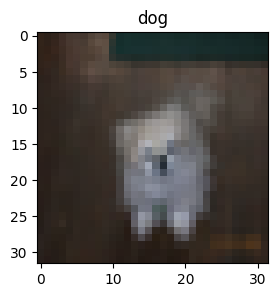

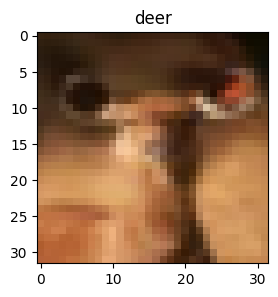

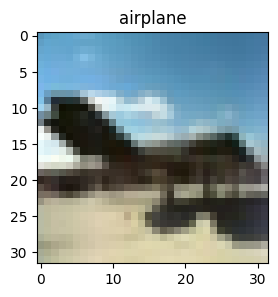

In [7]:
for i in range(3):
    plt.figure(figsize=(3, 3))
    index_random = random.randint(0, len(X_train))
    plt.title(labels[y_train[index_random][0]])
    plt.imshow(X_train[index_random])
    plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         7

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.7561 - accuracy: 0.4134 - val_loss: 1.4144 - val_accuracy: 0.4860
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3174 - accuracy: 0.5357 - val_loss: 1.1986 - val_accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1808 - accuracy: 0.5874 - val_loss: 1.2571 - val_accuracy: 0.5662
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0908 - accuracy: 0.6213 - val_loss: 1.0811 - val_accuracy: 0.6291
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0267 - accuracy: 0.6421 - val_loss: 1.0810 - val_accuracy: 0.6347
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9747 - accuracy: 0.6626 - val_loss: 1.0299 - val_accuracy: 0.6596
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9423 - accuracy: 0.6722 - val_loss: 1.1410 -

## Filter Visualization

32


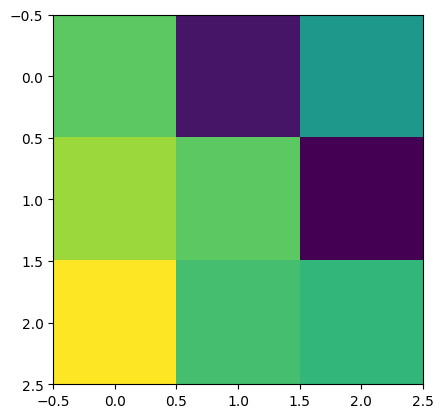

64


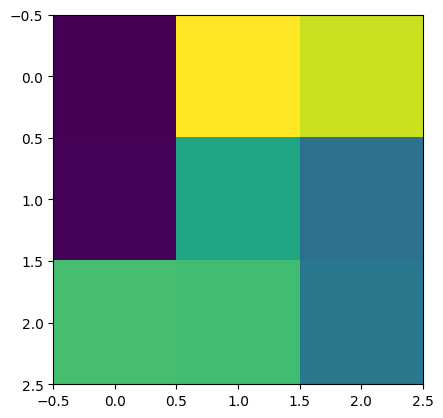

128


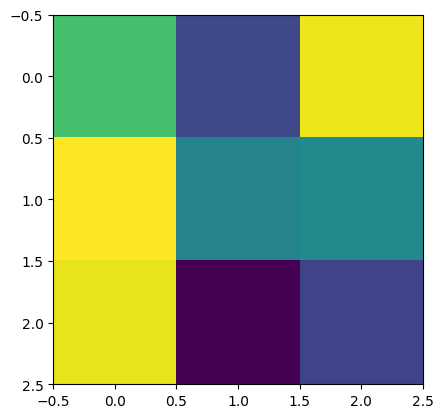

In [12]:
for layer in model.layers:
    if('conv' in layer.name):
        w,b = layer.get_weights()
        
        f_min, f_max = w.min(), w.max()
        filters = (w - f_min) / (f_max - f_min)
        print(filters.shape[3])

        fcount = 1

        for i in range(filters.shape[3]):
            inner_filter = filters[:,:,:,i][:,:,2]
            plt.imshow(inner_filter)
            # for j in range(filters.shape[0]):
            #     ax = plt.subplot(filters.shape[3], filters.shape[0], fcount)
            #     ax.set_xticks([])
            #     ax.set_yticks([])
            #     plt.imshow(inner_filter[:,:,j])
            #     fcount+=1
        
        plt.show()

## Kernel Visualization

bird
313/313 [==============================] - 1s 3ms/step
(10000, 15, 15, 32)
(10000, 13, 13, 64)
(10000, 6, 6, 64)
(10000, 6, 6, 64)
(10000, 4, 4, 128)
(10000, 2, 2, 128)
(10000, 512)
(10000, 512)
(10000, 10)


/var/folders/7n/498x98q54bbb5n96tdgsbc8h0000gn/T/ipykernel_82286/2811511719.py:22: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/var/folders/7n/498x98q54bbb5n96tdgsbc8h0000gn/T/ipykernel_82286/2811511719.py:25: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


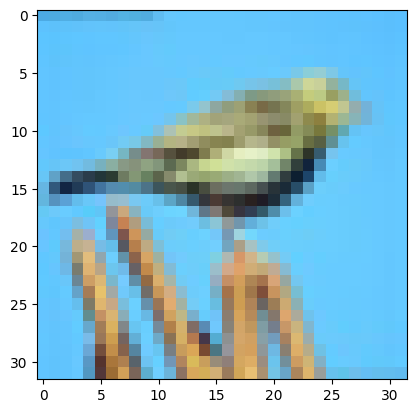

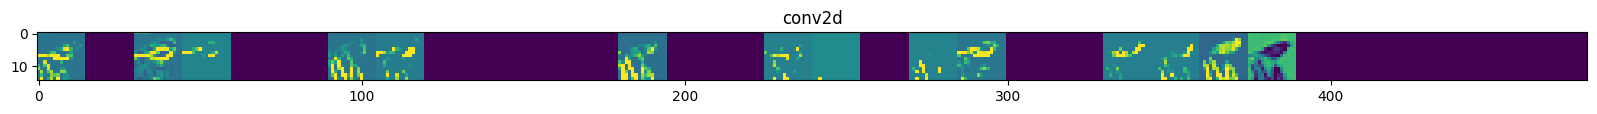

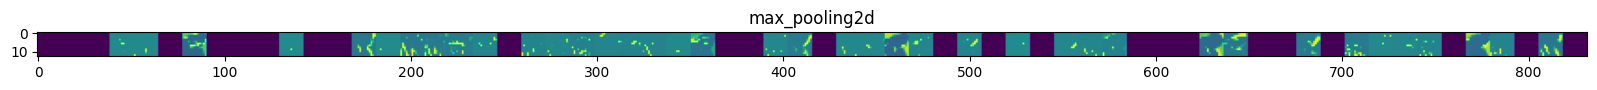

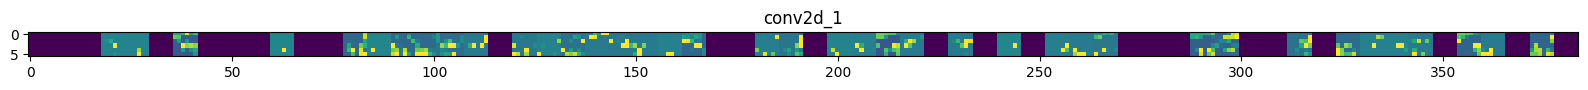

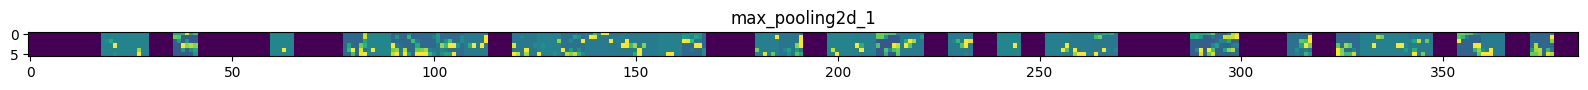

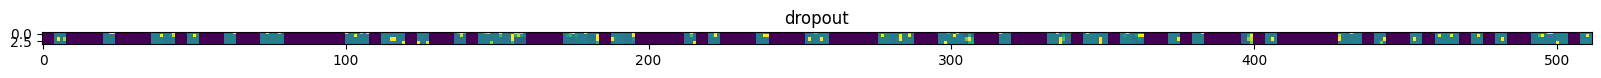

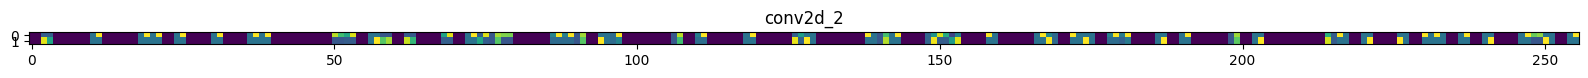

In [13]:
indix = 67

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

print(labels[y_test[indix][0]])

successive_feature_maps = visualization_model.predict(X_test)
layer_names = [layer.name for layer in model.layers]

plt.imshow(X_test[indix])

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[indix, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.0564 - accuracy: 0.6535


[1.0563993453979492, 0.6535000205039978]